In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [4]:
# today date: 23-05-22

data = "20-05-22"
file_name = "F5++"
name = "data/"+data+"/"+file_name+".txt"

file = open(name, "r")

F = []
Nions = []
std = []

for i, line in enumerate(file):
    line = line.replace("\n", "")
    splitted = line.split("\t")
    if i != 0:
        F.append(float(splitted[0]))
        Nions.append(float(splitted[1]))
        std.append(float(splitted[2]))

F, Nions, std = zip(*sorted(zip(F, Nions, std)))

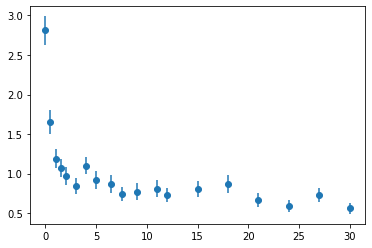

In [5]:
plt.errorbar(F, Nions, std, marker="o", linestyle="")
plt.show()

In [16]:
N_fit = 6 # number of point for each fit

rates = []
fit_results = []

def lin_f(x, a, b): return a*x+b;

for i in np.arange(len(F)-N_fit+1):
    pop, cov = curve_fit(lin_f, F[i:i+N_fit], Nions[i:i+N_fit], sigma=std[i:i+N_fit])
    ang_coff, intercept = pop
    Nions_middlefit = lin_f((F[i+N_fit-1]+F[i])/2, ang_coff, intercept)
    
    fit_results.append(pop)
    rates.append(-(ang_coff/Nions_middlefit))


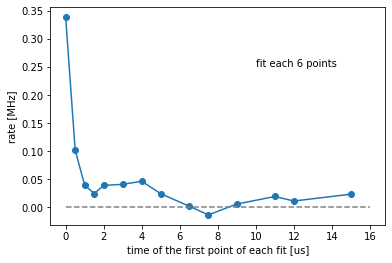

In [18]:
plt.plot(F[0:len(F)-N_fit+1], rates, marker="o")
plt.plot([0,max(F[0:len(F)-N_fit+1])+1],[0,0], linestyle="--", color="gray")
plt.text(10, 0.25, f"fit each {N_fit} points")
plt.xlabel("time of the first point of each fit [us]")
plt.ylabel("rate [MHz]")
plt.show()

In [8]:
print(F)
print(F[1])
print(F[1:1+N_fit])
print(F[1+N_fit-1])

(0.0, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.5, 7.5, 9.0, 11.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0)
0.5
(0.5, 1.0, 1.5)
1.5


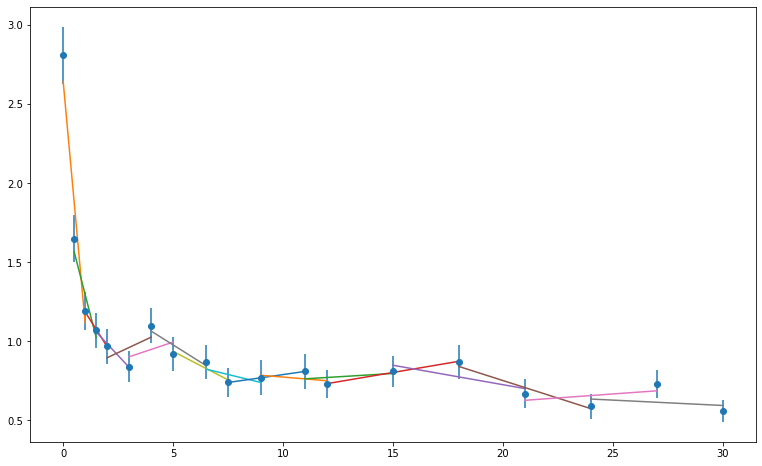

In [9]:
plt.figure(figsize=(13,8))
plt.errorbar(F, Nions, std, marker="o", linestyle="")

for i in range(len(fit_results)):
    x1, x2 = F[i], F[i+N_fit-1]
    y1, y2 = lin_f(x1, fit_results[i][0], fit_results[i][1]), lin_f(x2, fit_results[i][0], fit_results[i][1])
    plt.plot([x1, x2], [y1, y2])

plt.show()
    
